## Temperature forecast for Vienna with Prophet and ARIMA

## SETUP

In [119]:
#!pip install fbprophet
import pandas as pd
import numpy as np
import fbprophet
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.plot import add_changepoints_to_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
df = pd.read_csv('/home/lorena/Documents/bootcamp/W05/data/ECA_blended_custom_wien/TG_STAID000016.txt', skiprows=18, skipinitialspace=True)
df['TG'] = df['TG'] * 0.1
df['DATE'] = pd.to_datetime(df['DATE'].astype(str), format="%Y-%m-%d")
df = df[['TG','DATE']]

## Prophet

In [133]:
# For the prophet model, the date and value columns need to be named 'ds' and 'y'
df.columns = ['y', 'ds']
df.head()

y         ds
0 -0.9 1979-01-01
1 -9.4 1979-01-02
2 -7.3 1979-01-03
3 -5.4 1979-01-04
4 -7.4 1979-01-05

In [80]:
# Fit the model
prophet_model = Prophet()
prophet_model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [81]:
# Create a dataframe for predictions for one year ahead
future = prophet_model.make_future_dataframe(periods=365)
future.tail()

ds
7665 2020-12-26
7666 2020-12-27
7667 2020-12-28
7668 2020-12-29
7669 2020-12-30

In [82]:
# Make predictions for the year ahead

forecast = prophet_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
7665 2020-12-26  2.985883   -1.678492    7.684704
7666 2020-12-27  2.858829   -1.766498    7.538275
7667 2020-12-28  2.951210   -1.478798    7.506551
7668 2020-12-29  2.943130   -1.554404    7.315822
7669 2020-12-30  2.953924   -1.518794    7.360394

In [85]:
# Plot the predicted values
plot_plotly(prophet_model, forecast)

In [86]:
plot_components_plotly(prophet_model, forecast)

In [94]:
forecast[forecast['ds']>'2020-10-20'].head(10)

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
7599 2020-10-21  13.210714    7.030047   16.370028    13.187247    13.233654   
7600 2020-10-22  13.211239    7.601865   16.636451    13.187628    13.234430   
7601 2020-10-23  13.211765    6.937330   15.973601    13.188009    13.235114   
7602 2020-10-24  13.212290    6.778879   15.825082    13.188389    13.235794   
7603 2020-10-25  13.212816    6.421228   15.864436    13.188770    13.236518   
7604 2020-10-26  13.213341    6.445493   15.614378    13.189158    13.237217   
7605 2020-10-27  13.213867    6.737193   15.776999    13.189725    13.237907   
7606 2020-10-28  13.214392    6.427641   15.444827    13.190226    13.238597   
7607 2020-10-29  13.214918    6.100861   15.275094    13.190601    13.239287   
7608 2020-10-30  13.215443    6.497203   15.187358    13.190976    13.239977   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
7599       -1.440351             -1.440351             -1.440351 -0.007800   
7600       -1.458585             -1.458585             -1.458585  0.107682   
7601       -1.599758             -1.599758             -1.599758  0.094596   
7602       -1.825502             -1.825502             -1.825502 -0.008279   
7603       -2.064016             -2.064016             -2.064016 -0.128626   
7604       -2.078428             -2.078428             -2.078428 -0.028957   
7605       -2.188787             -2.188787             -2.188787 -0.028615   
7606       -2.276077             -2.276077             -2.276077 -0.007800   
7607       -2.266951             -2.266951             -2.266951  0.107682   
7608       -2.385538             -2.385538             -2.385538  0.094596   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
7599     -0.007800     -0.007800 -1.432551     -1.432551     -1.432551   
7600      0.107682      0.107682 -1.566267     -1.566267     -1.566267   
7601      0.094596      0.094596 -1.694355     -1.694355     -1.694355   
7602     -0.008279     -0.008279 -1.817223     -1.817223     -1.817223   
7603     -0.128626     -0.128626 -1.935389     -1.935389     -1.935389   
7604     -0.028957     -0.028957 -2.049470     -2.049470     -2.049470   
7605     -0.028615     -0.028615 -2.160172     -2.160172     -2.160172   
7606     -0.007800     -0.007800 -2.268277     -2.268277     -2.268277   
7607      0.107682      0.107682 -2.374633     -2.374633     -2.374633   
7608      0.094596      0.094596 -2.480135     -2.480135     -2.480135   

      multiplicative_terms  multiplicative_terms_lower  \
7599                   0.0                         0.0   
7600                   0.0                         0.0   
7601                   0.0                         0.0   
7602                   0.0                         0.0   
7603                   0.0                         0.0   
7604                   0.0                         0.0   
7605                   0.0                         0.0   
7606                   0.0                         0.0   
7607                   0.0                         0.0   
7608                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
7599                         0.0  11.770362  
7600                         0.0  11.752654  
7601                         0.0  11.612006  
7602                         0.0  11.386788  
7603                         0.0  11.148800  
7604                         0.0  11.134914  
7605                         0.0  11.025080  
7606                         0.0  10.938315  
7607                         0.0  10.947967  
7608                         0.0  10.829905

# ARIMA

In [41]:
df['temp_K'] = df['y']+273.15

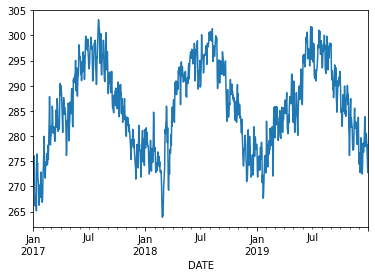

In [42]:
df['temp_K'].plot()

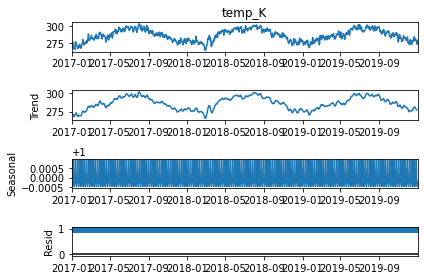

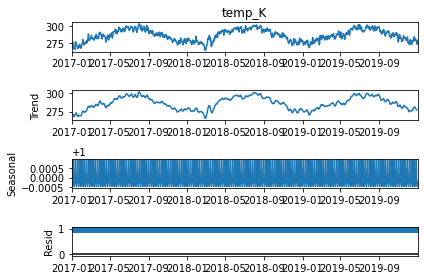

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['temp_K'], model='multiplicative')
result.plot()

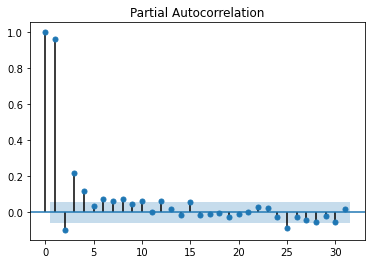

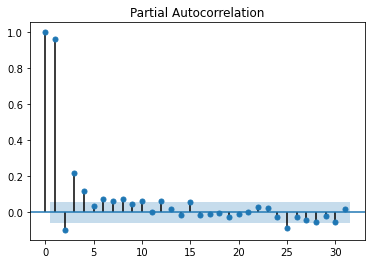

In [43]:
plot_pacf(df['temp_K'])

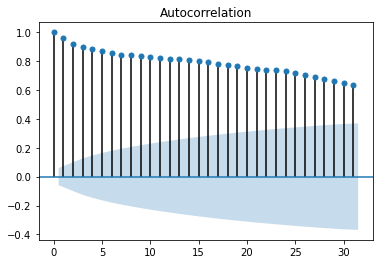

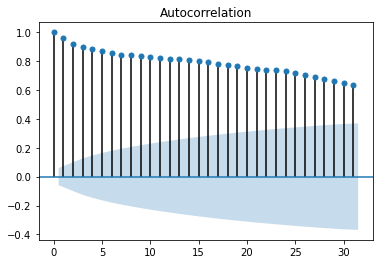

In [44]:
plot_acf(df['temp_K'])

In [45]:
# fit model
arima_model = ARIMA(df['temp_K'].values, order=(1,1,1))
arima_model_fit = arima_model.fit(disp=0)
print(arima_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1094
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2431.876
Method:                       css-mle   S.D. of innovations              2.234
Date:                Fri, 30 Oct 2020   AIC                           4871.753
Time:                        14:34:59   BIC                           4891.743
Sample:                             1   HQIC                          4879.317
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0084      0.074      0.113      0.910      -0.137       0.154
ar.L1.D.y     -0.3663      0.104     -3.513      0.000      -0.571      -0.162
ma.L1.D.y      0.5048      0.094      5.342      0.0

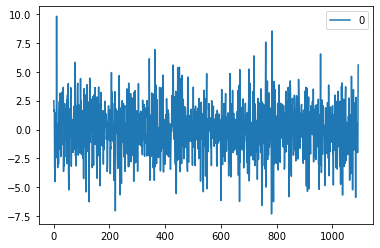

In [27]:
# plot residual errors
residuals = pd.DataFrame(arima_model_fit.resid)
residuals.plot()
plt.show()

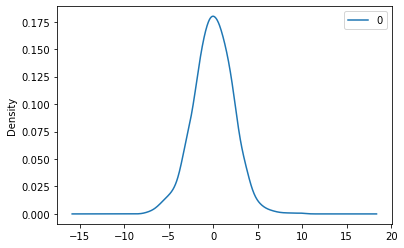

In [28]:
# density plot of the residual error values,
residuals.plot(kind='kde')
plt.show()

In [29]:
# distribution of the residual errors
print(residuals.describe())

                 0
count  1094.000000
mean     -0.000160
std       2.235448
min      -7.295641
25%      -1.417344
50%       0.018345
75%       1.461761
max       9.800541


In [34]:
X = df['y'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
error = MSE(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 5.382


In [40]:
mape = np.mean(np.abs(predictions - test)/np.abs(test))

inf

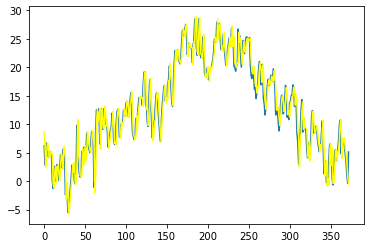

In [38]:
# plot
plt.plot(test)
plt.plot(predictions, color='yellow')
plt.show()